In [1]:
# Подключаем необходимые для анализа библиотеки

import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
import math as ms
import numpy as np

In [2]:
def normal_plot(df, array):
    voters = array
    x = voters
    
    source = {"Index": ["ind"]*len(x), "voters" : x} # Индексируем сырой массив из кол-ва избирателей представленной выборки

    df = pd.DataFrame(source)

    df_mean = np.mean(df["voters"])
    print('\nСреднее значение данной выборки = ', df_mean)
    
    df_std = np.std(df["voters"])
    print('\nНормальное отклонение  данной выборки = ', df_std)
    
    # Расчёт Probability Density Function/Функция плотности вероятности (array, mu, sigma)
    # Применяется на сортированный массив
    pdf = norm.pdf(df["voters"].sort_values(), df_mean, df_std)
    
    plt.plot(df["voters"].sort_values(), pdf)
    plt.xlim([-1200,4000])  
    plt.xlabel("Кол-во избирателей", size=16)    
    plt.ylabel("Частота", size=16)                
    plt.grid(True, alpha=0.3, linestyle="--")
    plt.show()

In [3]:
# Формируем DataFrame

path ="~/Downloads/russia.ods"
raw_df = pd.read_excel(path, engine = 'odf')
raw_df[['tik', 'Число избирателей, внесенных в список избирателей на момент окончания голосования']]

,tik,"Число избирателей, внесенных в список избирателей на момент окончания голосования"
0,Алтайская,385
1,Алтайская,1515
2,Алтайская,1175
3,Алтайская,2257
4,Алтайская,1924
...,...,...
96320,Нахимовская,2286
96321,Нахимовская,1589
96322,Нахимовская,1333
96323,Нахимовская,1235


In [5]:
# Формируем отдельный DataFrame только с кол-вом избирателей для расчётов

raw_voters = raw_df['Число избирателей, внесенных в список избирателей на момент окончания голосования']
print(raw_voters)


0         385
1        1515
2        1175
3        2257
4        1924
         ... 
96320    2286
96321    1589
96322    1333
96323    1235
96324     992
Name: Число избирателей, внесенных в список избирателей на момент окончания голосования, Length: 96325, dtype: int64


In [6]:
# Считаем объем выборки по формуле

N=int((1.95**2*0.5*0.5)/0.04**2)
print('Объем выборки N =',N)

Объем выборки N = 594


In [7]:
# Проводим необходимые для выборок и анализа расчёты 

n = len(raw_voters)        # Кол-во избирателей
mean = (sum(raw_voters)/n) # Мат.ожидание по количеству избирателей
print('Количество избирателей = ', n)
print('Математическое ожидание = ', mean)

shifted_dispersion = sum((i-mean)**2 for i in raw_voters)/n
print('Дисперсия смещённая = ', shifted_dispersion)

dispersion = n*shifted_dispersion/(n-1) # Не смещённая дисперсия

sigma = ms.sqrt(dispersion) # Среднеквадратичное отклонение
print('Sigma = ', sigma)
triple_sigma = sigma*3
print('x3 Sigma = ', triple_sigma)


Количество избирателей =  96325
Математическое ожидание =  1133.7104801453413
Дисперсия смещённая =  3664191.336474116
Sigma =  1914.2176931446295
x3 Sigma =  5742.653079433889


In [8]:
df_array = np.array(raw_voters) # Переводим сырой DataFrame избирателей в массив

standart_deviation = np.std(df_array) # Стандартное отклонение


In [9]:
# Чистим генеральную выборку через x3 Sigma

elements = np.array(raw_voters)
print(elements)
mean = np.mean(elements, axis=0) # Среднее по массиву избирателей
std = np.std(elements, axis=0) # Standart Deviation / Нормальное отклонение

data =np.array(raw_voters)

df = pd.DataFrame({
                'raw_voters': raw_df['Число избирателей, внесенных в список избирателей на момент окончания голосования'].tolist(),
                'reg': raw_df['reg'].tolist()}
                  )
triple_sigma_left= df['raw_voters'].mean() - 3 * sigma
print ('Левая х3 Sigma =',triple_sigma_left)


triple_sigma_right= df['raw_voters'].mean() + 3 * sigma
print ('Правая x3 Sigma = ',triple_sigma_right)


df=df.loc[(df['raw_voters'] >mean-3 * sigma) & (df['raw_voters'] <mean+3 * sigma)]

probability = len(df)/(len(raw_df)/100)
print('\nВероятность того, что значение нормально распределённой случайной величины лежит в указанном интервале= ', probability,'%\n' )

print(df)

[ 385 1515 1175 ... 1333 1235  992]
Левая х3 Sigma = -4608.942599288547
Правая x3 Sigma =  6876.36355957923

Вероятность того, что значение нормально распределённой случайной величины лежит в указанном интервале=  99.96366467687517 %

       raw_voters                reg
0             385     Алтайский край
1            1515     Алтайский край
2            1175     Алтайский край
3            2257     Алтайский край
4            1924     Алтайский край
...           ...                ...
96320        2286  город Севастополь
96321        1589  город Севастополь
96322        1333  город Севастополь
96323        1235  город Севастополь
96324         992  город Севастополь

[96290 rows x 2 columns]


In [10]:
df=df.reset_index()
df

,index,raw_voters,reg
0,0,385,Алтайский край
1,1,1515,Алтайский край
2,2,1175,Алтайский край
3,3,2257,Алтайский край
4,4,1924,Алтайский край
...,...,...,...
96285,96320,2286,город Севастополь
96286,96321,1589,город Севастополь
96287,96322,1333,город Севастополь
96288,96323,1235,город Севастополь



МЕХАНИЧЕСКАЯ ВЫБОРКА

Шаг выборки =  162 

       raw_voters                    reg
0             385         Алтайский край
162           988         Алтайский край
324          1044         Алтайский край
486            81         Алтайский край
648           404         Алтайский край
...           ...                    ...
95614        2419  город Санкт-Петербург
95776        2987  город Санкт-Петербург
95938        2753  город Санкт-Петербург
96100        2540  город Санкт-Петербург
96263        1806      город Севастополь

[595 rows x 2 columns]

 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1147.1966386554623

Нормальное отклонение  данной выборки =  812.4359946277935


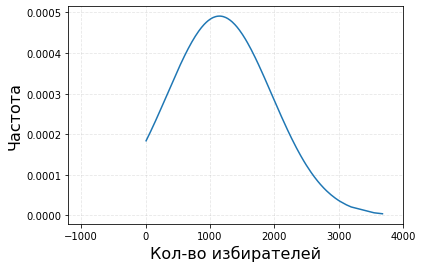

In [9]:

print("\nМЕХАНИЧЕСКАЯ ВЫБОРКА")

count = int(n/N) # Делим кол-во избирателей на объем выборки
print('\nШаг выборки = ', count, '\n')


mechanical_df = df.iloc[::count] # Создаем из генеральной выборки механическую, оставляя только каждый 162-ой элемент
print(mechanical_df)

print('\n Мат.ожидание по генеральной выборке =', mean)

mech_voters = np.array(mechanical_df["raw_voters"])

normal_plot(mechanical_df, mech_voters)


СЛУЧАЙНАЯ ВЫБОРКА

       raw_voters                            reg
1172          142                 Алтайский край
96250        1948              город Севастополь
50215         288        Республика Башкортостан
8423          708          Волгоградская область
31884        1798             Московская область
...           ...                            ...
67115         415              Рязанская область
2121          426               Амурская область
18300        1039  Кемеровская область - Кузбасс
95791        2185          город Санкт-Петербург
83901         569               Хабаровский край

[594 rows x 2 columns]

 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1151.0218855218855

Нормальное отклонение  данной выборки =  812.7477925337588


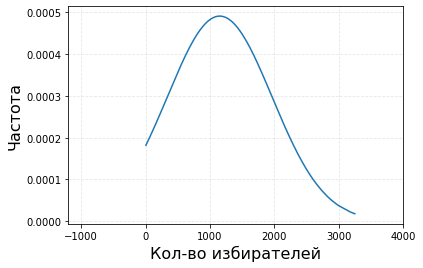

In [10]:
# Случайная выборка

print('\nСЛУЧАЙНАЯ ВЫБОРКА\n')

random_df=df.sample(N) # С помощью sample генерируем случайный DataFrame с размер выборки
print(random_df)

print('\n Мат.ожидание по генеральной выборке =', mean)

random_voters = np.array(random_df["raw_voters"])
normal_plot(random_df, random_voters)


ТИПИЧЕСКАЯ ВЫБОРКА

Минимальное кол-во избирателей в выборке =  0
Максимальное кол-во избирателей в выборке =  5260
Кол-во выделенных групп =  17 

       raw_voters                               reg  Группа
27578         211                   Курская область       1
25559         183                 Красноярский край       1
61348         264  Республика Татарстан (Татарстан)       1
41566         125                    Омская область       1
3049          276             Архангельская область       1
...           ...                               ...     ...
63633        3002  Республика Татарстан (Татарстан)      10
72668        3014              Свердловская область      10
58119        2881                   Республика Крым      10
45889        2797                     Пермский край      10
68565        3098                 Самарская область      11

[592 rows x 3 columns]

 Мат.ожидание по генеральной выборке = 1133.7104801453413

Среднее значение данной выборки =  1063.4628378

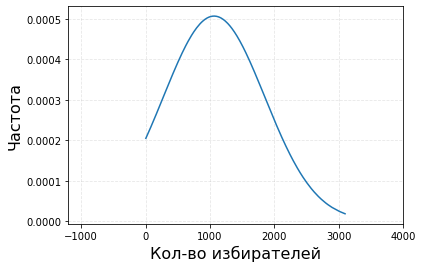

In [11]:
# Типическая выборка
print('\nТИПИЧЕСКАЯ ВЫБОРКА\n')

type_df = df.loc[~df['reg'].isin(["город Санкт-Петербург", "город Москва"])]

type_df = type_df.reset_index(drop=True)

min_value=type_df.min()[0]
max_value=type_df.max()[0]

print("Минимальное кол-во избирателей в выборке = ", min_value)
print("Максимальное кол-во избирателей в выборке = ", max_value)

# Считаем кол-во групп по формуле
group_N = int(1+3.322*ms.log10(n))
print("Кол-во выделенных групп = ", group_N,'\n')
group_border=(max_value-min_value)/group_N

# Присваем каждой строчке группу
raw_groups = []
groups_counter=[]

#Создаем семнадцать значение по которым кол-ва избирателей будут сортироваться по группам
for i in range(group_N+1):
    groups_counter.append(group_border*i)

#Сортировка по каждой строчке
for i in range(len(type_df)):
    j=0
    while (j<len(groups_counter)):
        if(type_df['raw_voters'][i]<=groups_counter[j]):
            raw_groups.append(j)
            break
        else:
            j+=1

# Добавляем к ещё сырой выборке столбец со значением группы для каждого кол-ва избирателей
type_df['Группа'] = raw_groups


# Механический сэмплинг из каждой группы
mechanical_sampling=type_df.groupby('Группа', group_keys=False).apply(lambda x: x.sample(frac=N/len(type_df)))

print(mechanical_sampling)

print('\n Мат.ожидание по генеральной выборке =', mean)

type_voters = np.array(mechanical_sampling["raw_voters"])
normal_plot(mechanical_sampling, type_voters)
